Saul VILLAMIZAR
# Nonlinear programming algorithms  
In this short report you will find the application of different gradient methods for unconstrained and constrained optimization. The code was fully developed in Python3 with the support of the `Numpy` library to ease the matrices’ manipulation and `Matplotlib` for the graphs.  
**Unconstrained Optimization (Task 5, 6)** Are explained in this file   
**Hanging chain problem (Task 9)** Are explained in `Chainnete.ipynb` file

___

# Unconstrained Optimization 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import ipywidgets as widgets
from IPython.display import display

## 1) Oracle creation  
An Oracle is created for each fonction in order to evaluate its value for a given input vector and its gradient as well.  
***All the treated fonctions are convex***

$$
f_2(X) = X_0^2 + X_1^2+2X_0X_1 \; ; \; X \in \mathbb{R}^2 \\
\nabla f_2(X) = \begin{bmatrix}
   2X_0+2X_1 \\
   2X_0+2X_1 
\end{bmatrix}
$$

In [2]:
def f2(X):
    return X[0]**2+X[1]**2+2*X[0]*X[1]
def g2(X):
    return np.array([2*X[0]+2*X[1],2*X[0]+2*X[1]])

def oracle2(X, mode):
    if mode==1:
        return f2(X),None 
    elif mode==2:
        return f2(X),g2(X)
    elif mode==3:
        return None,g2(X)
    else:
        print('Not on the list')

$$
f_3(X) = X_0^2 + X_1^2 - 2X_0X_1 \; ; \; X \in \mathbb{R}^2 \\
\nabla f_3(X) = \begin{bmatrix}
   2X_0-2X_1 \\
   2X_1-2X_0 
\end{bmatrix}
$$

In [3]:
def f3(X):
    return X[0]**2+X[1]**2-2*X[0]*X[1]
def g3(X):
    return np.array([2*X[0]-2*X[1],2*X[1]-2*X[0]])

def oracle3(X, mode):
    if mode==1:
        return f3(X),None 
    elif mode==2:
        return f3(X),g3(X)
    elif mode==3:
        return None,g3(X)
    else:
        print('Not on the list')        

$$
f_6(X) = \frac{||X||^2}{2} \; ; \; X \in \mathbb{R}^n \\
\nabla f_6(X) = \begin{bmatrix}
   X_0 \\
   X_1 \\
   X_2 \\
   \vdots \\
   X_n
\end{bmatrix}
$$

In [4]:
def f6(X):
    return 0.5*np.linalg.norm(X)**2
def g6(X):
    return X

def oracle6(X, mode):
    if mode==1:
        return f6(X),None 
    elif mode==2:
        return f6(X),g6(X)
    elif mode==3:
        return None,g6(X)
    else:
        print('Not on the list')  

## 2) Gradient method implementaiton

2 Python Fonctions where created:  
### `Optimize`   
Is the algorithm for the gradient method. Here the value of the X is updated on each iteration until the stop condition is satisfied $|\nabla f(X)|< tol$. Its mandatory input parameters are an initial value of X `x0` and the correspondig `oracle` of the fonction to optimize.  
### `Armijo`   
This is the Armijo's line search method called by `Optimize` at each iteration.  
The parameters are the current value of `X` ($X_k$) the direction `d` (In this case it will always be $d=-\nabla f$ ) and the `oracle` for the corresponding fonction

In [5]:
def Armijo(X,d,oracle,MaxItLineSearch,t0 = 100, theta=0.2, m=0.001):
    p=0
    t = [t0]
    while True:
        f, g = oracle(X, mode=2)
        
        f1, g1 = oracle(X+t[-1]*d, mode=1)
        
        if f1 <= f + m*t[-1]*np.dot(g,d):
            return t[-1]
        else:
            t.append(theta*t[-1])
            if p<MaxItLineSearch:
                p+=1
            else:
                print(f'Max iterations \n\t direction: {d} \n\t step:{t[-1]}')
                raise ValueError('Max iteration')

            
def Optimize(x0,oracle, MaxIt=1000,tol = 10e-6, MaxItLineSearch=50, step = 100):
    k=0
    X =  [x0] 
    while True:
        f, g = oracle(X[-1], mode=2)
        if np.linalg.norm(g)<tol:
            print (f'Converged on {X[-1]}')
            return X[-1],X
        else:
            d = -g
            try:
                step = Armijo(X[-1],d, oracle, MaxItLineSearch=MaxItLineSearch, t0 = 100)
            except ValueError:
                print('Max armijo line search iterations')
                return None,X                                
            X.append(X[-1] + step*d)
            if k<MaxIt:
                k+=1
            else:
                print('Max iterations')
                return None,X           

## 3) Testing the code

Each fonction was tested with an initial vector $X$ filled with ones.  
Then a graphical representation of the iteration was made over the level curves. We can observe how Armijo's line search modify the length of the steps. As we aproach the critical point, the steps become shorter

### $f_2$  

In [6]:
X_init = np.array([1,1])
x_opt2,x2 = Optimize(X_init,oracle2)
print(f'After {len(x2)} iteration we get a value that satisfies our STOP condition where the gradient is almost 0')

Converged on [1.70581728e-06 1.70581728e-06]
After 14 iteration we get a value that satisfies our STOP condition where the gradient is almost 0


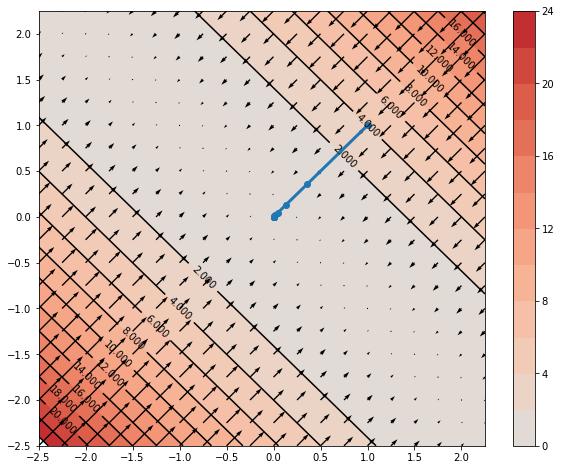

In [7]:
delta = 0.25
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.5, 2.5, delta)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2 + 2*X*Y

dX = 2*X + 2*Y
dY = 2*Y + 2*X

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
levels = np.arange(Z.min(),Z.max(),2)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
CS2 = ax.contour(X, Y, Z, levels=levels, norm=norm, colors='k')
fig.colorbar(CS, ax=ax)
ax.clabel(CS2, inline=1, fontsize=10)
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ticksx = plt.xticks(np.arange(min(x),max(x), 0.5))
ticksy = plt.yticks(np.arange(min(x), max(x), 0.5))

q = ax.quiver(x, y, -dX, -dY)

Xk1 = [x2[k][0] for k in range(len(x2))]
Xk2 = [x2[k][1] for k in range(len(x2))] 

tray  = ax.plot(Xk1, Xk2, linewidth=3, marker='o')

### $f_3$  
In this case, the initial point is already a critical point, so no iterations are made.

In [8]:
x_opt3,x3 = Optimize(np.array([1,1]),oracle3)

Converged on [1 1]


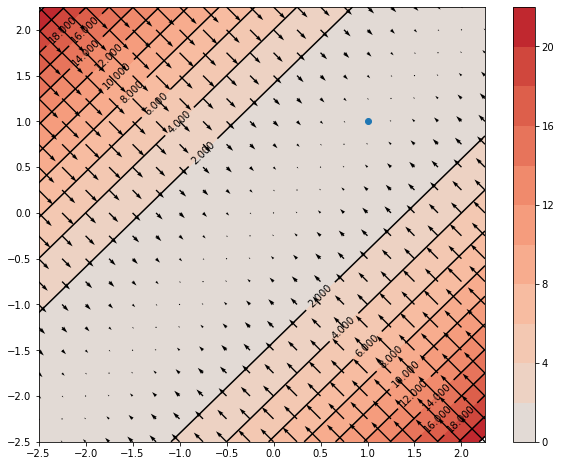

In [9]:
delta = 0.25
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.5, 2.5, delta)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2 - 2*X*Y

dX = 2*X - 2*Y
dY = 2*Y - 2*X

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
levels = np.arange(Z.min(),Z.max(),2)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
CS2 = ax.contour(X, Y, Z, levels=levels, norm=norm, colors='k')
fig.colorbar(CS, ax=ax)
ax.clabel(CS2, inline=1, fontsize=10)
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ticksx = plt.xticks(np.arange(min(x),max(x), 0.5))
ticksy = plt.yticks(np.arange(min(x), max(x), 0.5))

q = ax.quiver(x, y, -dX, -dY)

Xk1 = [x3[k][0] for k in range(len(x3))]
Xk2 = [x3[k][1] for k in range(len(x3))] 

tray  = ax.plot(Xk1, Xk2, linewidth=1, marker='o')

### $f_6$
First we try with $X \in \mathbb{R}^2$ in order to see graphically if the behavior of the interations is correct.

In [10]:
x_opt6,x6 = Optimize(np.array([1,1]),oracle6)
print(f'After {len(x6)} iteration we get a value that satisfies our STOP condition where the gradient is almost 0')

Converged on [2.56e-06 2.56e-06]
After 9 iteration we get a value that satisfies our STOP condition where the gradient is almost 0


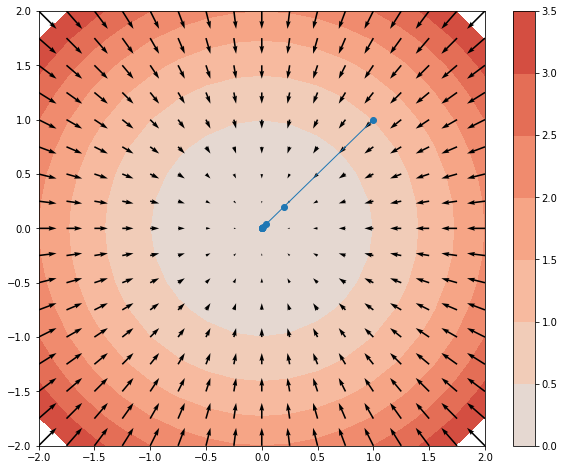

In [11]:
delta = 0.25
x = np.arange(-2, 2.1, delta)
y = np.arange(-2, 2.1, delta)
X, Y = np.meshgrid(x, y)
Z = 0.5*(X**2+Y**2)

dX = X
dY = Y

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
levels = np.arange(round(Z.min()),round(Z.max()),0.5)

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
fig.colorbar(CS, ax=ax)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

Xk1 = [x6[k][0] for k in range(len(x6))]
Xk2 = [x6[k][1] for k in range(len(x6))] 

q = ax.quiver(x, y, -dX, -dY)

tray  = ax.plot(Xk1, Xk2, linewidth=1, marker='o')

Then we try with $X \in \mathbb{R}^{10000}$

In [12]:
%time
x_opt6_1000,x6_1000 = Optimize(np.ones(10000),oracle6)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs
Converged on [2.048e-08 2.048e-08 2.048e-08 ... 2.048e-08 2.048e-08 2.048e-08]


## 4) Application over $f_7$

Modified for python, index starting at 0
$$
f_7(X) = \underset{i=0}{\overset {n-1} {\sum}} \left [(i+1)X_i^2 + 10X_i^4 \right ] \; ; \; X \in \mathbb{R}^n \\
\nabla f_7(X) = \begin{bmatrix}
   2(0+1)X_0+40X_0^3 \\
   2(1+1)X_1+40X_1^3 \\
   \vdots \\
   2(n)X_n+X_n^3 \\
\end{bmatrix}
$$

In [13]:
def f7(X):
    F = np.copy(X)
    return sum([(i+1)*X[i]**2+10*X[i]**4 for i in range(len(F))])
def g7(X):
    G = np.copy(X)
    for i in range(len(G)):
        G[i]=2*(i+1)*X[i]+40*X[i]**3
    return G

def oracle7(X, mode):
    if mode==1:
        return f7(X),None 
    elif mode==2:
        return f7(X),g7(X)
    elif mode==3:
        return None,g7(X)
    else:
        print('Not on the list')

In [14]:
z=10*np.ones(10)
z[-1]=-10
x_opt7,x7 = Optimize(z,oracle7, MaxIt=10000, MaxItLineSearch=50)    

Converged on [-2.05090137e-06 -7.60084583e-14  2.92708597e-36  3.24936591e-18
  5.66530051e-12  3.78545095e-09  9.39297114e-08  3.08151552e-07
  2.11224831e-07 -3.37850333e-08]
